## Model Training
1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 

Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
x=df.drop(columns=['math_score'],axis=1)
y=df.math_score

In [6]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [31]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'object'] # cat_features= x.select_dtypes(include='object').columns
numerical_columns=[col for col in x.columns if x[col].dtype !='object'] # num_features= x.select_dtypes(exclude='object').columns
for i in categorical_columns:
    print(f"categories in {i} variable: {df[i].unique()}")

categories in gender variable: ['female' 'male']
categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable: ['standard' 'free/reduced']
categories in test_preparation_course variable: ['none' 'completed']


In [16]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [32]:
# Create column transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer([("onehotencoder", oh_transformer, categorical_columns),("StabdardScaler", numeric_transformer, numerical_columns)])

In [33]:
x=preprocessor.fit_transform(x)

In [34]:
x.shape

(1000, 19)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

Create an Evaluate Function to give all metrics after model Training

In [36]:
def evaluate_model(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    rmse=np.sqrt(mean_squared_error(true,predict))
    r2_square=r2_score(true,predict)
    return mae,mse,rmse,r2_square

In [38]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Evaluate train and test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_square=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_square=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for trainig set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))
    print("------------------------------------------------")
    print('\nModel performance for test set')
    print('Model performance for test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    r2_list.append(model_test_r2_square)
    print('='*35)
    print('\n')


Linear Regression
Model performance for trainig set
- Root Mean Squared Error: 5.3243
- Mean Squared Error: 28.3485
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
------------------------------------------------

Model performance for test set
Model performance for test set
- Root Mean Squared Error: 5.3960
- Mean Squared Error: 29.1167
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for trainig set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------------------------------------

Model performance for test set
Model performance for test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for trainig set
- Root Mean Squared Error: 5.3233
- Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
------------------------------------------------

Model performance for tes

Results

In [42]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','r2_score']).sort_values(by='r2_score',ascending=False)

,Model name,r2_score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851175
8,AdaBoost Regressor,0.845363
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.743259


Linear Regression

In [43]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 88.03


Plot y_pred and y_test

Text(0, 0.5, 'predicted')

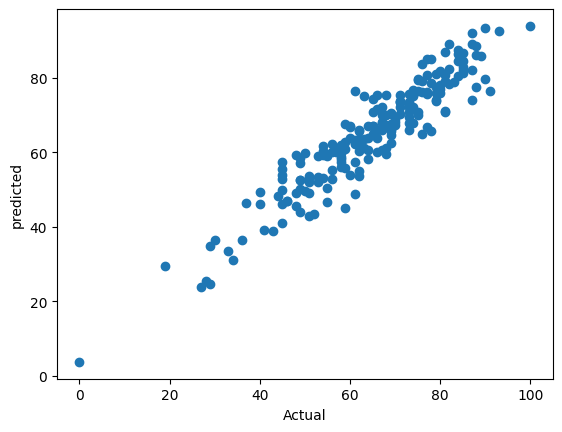

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

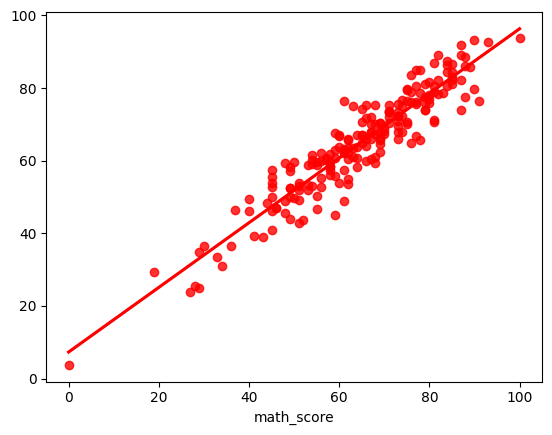

In [45]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference between Actual and Predicted Values

In [46]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
